# Twitter Verileri Üzerinde Duygu Analizi (Sentiment Analysis)

Sosyal medya platformları, kullanıcıların fikirlerini, düşüncelerini ve duygularını paylaşmaları için popüler bir ortam haline gelmiştir. Bu platformlarda paylaşılan milyonlarca tweet, kullanıcıların görüşlerini anlamak ve toplumun genel duygusal durumunu belirlemek için değerli bir kaynak olabilir. Bu projede, Türkçe tweetler üzerinde duygu analizi yaparak, kullanıcıların duygusal tepkilerini anlamak ve değerli bilgiler elde etmek hedeflenmektedir.

## Projenin Amacı:

- Twitter verilerini toplayarak duygu analizi için bir veri seti oluşturmak.
- Türkçe tweetlerin duygusal durumunu analiz etmek ve duygu polaritesini belirlemek.
- Duygu analizi sonuçlarını görselleştirmek ve anlamlı bilgiler elde etmek.
- Elde edilen sonuçları raporlamak ve sunmak.

## Kullanılan Yöntemler:

- Veri ön işleme adımlarıyla tweetlerin temizlenmesi ve düzenlenmesi.
- TextBlob kütüphanesi ile duygu analizi yapılması.
- Elde edilen sonuçların bir veri çerçevesinde depolanması ve analiz için kullanılması.
- Görselleştirme araçları ile duygu analizi sonuçlarının kelime bulutları veya grafiklerle görselleştirilmesi.

Bu projenin amacı, verilen Türkçe tweetlerin duygu analizini yaparak ve her bir tweet için duygu polaritesi, duygu özneliği ve duygu değerini (Pozitif, Negatif veya Notr) içeren bir result_df veri çerçevesi oluşturmaktır. Bu veri çerçevesini daha sonra çeşitli analizler, raporlar veya görselleştirmeler için kallanmaktır.

## Duygu Analizi İçin Gerekli Kütüphaneler Yüklenmesi

In [1]:
# Veri manipülasyonu ve analizi
import pandas as pd
# Doğal dil işleme için metin analizi
from textblob import TextBlob 
# Metin tabanlı kelime bulutu oluşturma
from wordcloud import WordCloud
# Doğal dil işleme için dil modeli
from nltk.corpus import stopwords
# Veri görselleştirme için
import matplotlib.pyplot as plt
import re

## Tweet Verileri yükleniyor

In [2]:
tweets = pd.read_excel("twitter_lists.xlsx")

In [3]:
#tweets.head()
tweets.shape

(149, 1)

In [4]:
tweets.columns=['origin']
tweets['origin']

0      @TuranHancerli Sayın Başkanım Tahtakale mahall...
1      @TuranHancerli Yeşilken mahallesi imarı bir an...
2      @TuranHancerli sayın başkan daha toplantıda mo...
3      @TuranHancerli sayın başkan toplantinizi takip...
4      @TuranHancerli @cakman4 Açıklamalarınız için ç...
                             ...                        
144    @avcilarbel Merhaba, Avcılar da kentsel dönüşü...
145    @avcilarbel gümüş pala asker sokaktaki bu ağaç...
146    Sizlerin düzgün atmadığı çöpler, bellerin eğil...
147    Avcılar belediyesi ve zabıtanın bu kadar umurs...
148    @TuranHancerli Avcılar her geçen gün güzelleşi...
Name: origin, Length: 149, dtype: object

# Tweetleri temizleme ve düzenleme işlemleri

Metinler genellikle çeşitli gürültü içerir, örneğin URL'ler, kullanıcı adları, hashtag'ler, sayılar, noktalama işaretleri vb. Bu unsurlar, metindeki anlamı etkilemeyen ve analiz sürecini karmaşıklaştıran öğelerdir. Temizleme işlemleri, bu gürültüyü azaltmaya yardımcı olur.

**Bu anlizde yapılan temizleme ve düzenleme işlemleri:**
- URL'ler kaldırıldı
- Kullanıcı adları kaldırıldı
- Hashtag'ler kaldırıldı
- Sayılar kaldırıldı
- Noktalama işaretleri kaldırıldı
- Birden fazla boşluğu tek bir boşlukuk ile değiştirildi

In [5]:
# Tweetleri temizleme ve düzenleme işlemleri için yardımcı fonksiyonlar
def preprocess_tweet(tweet):
    # URL'leri kaldırma
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    # Kullanıcı adlarını kaldırma
    tweet = re.sub(r"\@\w+", "", tweet)
    # Hashtag'leri kaldırma
    tweet = re.sub(r"\#\w+", "", tweet)
    # Sayıları kaldırma
    tweet = re.sub(r"\d+", "", tweet)
    # Noktalama işaretlerini kaldırma
    tweet = re.sub(r"[^\w\s]", "", tweet)
    # Birden fazla boşluğu tek bir boşlukla değiştirme
    tweet = re.sub(r"\s+", " ", tweet).strip()
    return tweet

In [16]:
# Temizlenmiş tweetleri cleaned_tweets değişkenine atıyoruz
cleaned_tweets = [preprocess_tweet(tweet) for tweet in tweets['origin']]

In [17]:
# Pandas DataFrame oluşturuyoruz
cleaned_df = pd.DataFrame({'cleaned': cleaned_tweets})

In [18]:
# Varsa boş satırlar kaldırılıyor
cleaned_df.dropna(inplace=True)

In [19]:
# DataFrame'deki boş değer olup-olmadığı kontrol ediliyoruz
cleaned_df.isnull().sum()

cleaned    0
dtype: int64

In [20]:
cleaned_df

,cleaned
0,Sayın Başkanım Tahtakale mahallesi de çok sıkı...
1,Yeşilken mahallesi imarı bir an önce ibb den o...
2,sayın başkan daha toplantıda moderatör organiz...
3,sayın başkan toplantinizi takip etmeye geldik ...
4,Açıklamalarınız için çok teşekkür ederiz
...,...
144,Merhaba Avcılar da kentsel dönüşüm nedeni ile ...
145,gümüş pala asker sokaktaki bu ağaçları budarmı...
146,Sizlerin düzgün atmadığı çöpler bellerin eğilm...
147,Avcılar belediyesi ve zabıtanın bu kadar umurs...


## Türkçe tweetlerin ingilizceye cevrilmesi

TextBlob, doğal dil işleme işlemleri için kullanılan bir kütüphanedir. Özellikle duygu analizi gibi bazı NLP görevleri, İngilizce metin üzerinde daha iyi performans gösterebilir. Bunun nedeni, TextBlob'un duygu analizi yaparken İngilizce dil kaynaklarını kullanması ve bu kaynakların İngilizce metinlere daha iyi uyarlanmış olmasıdır.

Türkçe metni İngilizceye çevirmenin temel amacı, TextBlob'un duygu analizi yaparken daha iyi sonuçlar vermesini sağlamaktır. İngilizceye çevrilen metin, TextBlob'un duygusal ifadeleri ve kelime anlamlarını daha iyi anlamasına yardımcı olabilir.

Ancak, doğrudan Türkçe metin üzerinde de duygu analizi yapabilirsiniz. TextBlob, Türkçe dil desteğine de sahip olmasına rağmen, İngilizce dil kaynaklarına göre daha sınırlıdır. Bu nedenle, duygu analizinde daha iyi sonuçlar almak için Türkçe metni İngilizceye çevirme yaklaşımı sıklıkla tercih edilir.

Sonuç olarak, TextBlob kullanarak duygu analizi yaparken Türkçe metni İngilizceye çevirmeniz, daha güçlü ve geniş kapsamlı bir duygu analizi gerçekleştirmenize yardımcı olabilir. Ancak, eğer Türkçe dil kaynaklarına dayalı bir duygu analizi yapmak isterseniz, Türkçe metni doğrudan kullanabilirsiniz.

In [21]:
#!pip install googletrans==4.0.0-rc1
# Google Translate API'sini içe aktaralım
from googletrans import Translator

def translate_to_english(tweet):
    translator = Translator(service_urls=['translate.google.com'])
    try:
        tweet_en = translator.translate(tweet, src='tr', dest='en')
        return tweet_en.text
    except Exception as e:
        return '' 

translated_tweets = [translate_to_english(tweet) for tweet in cleaned_df['cleaned']]

In [22]:
# Pandas DataFrame oluşturuyoruz
translated_df = pd.DataFrame({'translated' : translated_tweets})
# Varsa boş satırları kaldırıyoruz
translated_df.dropna(inplace=True)
translated_df

,translated
0,"Mr. President, Tahtakale Neighborhood, a very ..."
1,Yeşilken Neighborhood Development must be take...
2,"Mr. President, you could not organize a modera..."
3,"Mr. President, we came to follow your meeting,..."
4,Thank you very much for your explanations
...,...
144,"Hello hunters, there is an unplanned work due ..."
145,Silver Pala Soldier are these trees on the street
146,The garbage that you do
147,It is not believed that Avcılar Municipality a...


## TextBlob kütüphanesi ile duygu analizi yapılması

TextBlob tarafından sağlanan sentiment özellikleri kullanılarak duygu polaritesi (pozitif, negatif veya nötr) ve duygu özneliği değeri belirlenir.

In [23]:
columns = ['translated', 'polarity', 'subjectivity', 'value']
result_df = pd.DataFrame(columns=columns)

for i, tweet in enumerate(translated_df['translated']):
    if tweet != '':
        analysis = TextBlob(tweet)
        result = analysis.sentiment
        result_df.loc[i, 'translated'] = tweet
        if result.polarity > 0:
            result_df.loc[i, 'polarity'] = result.polarity
            result_df.loc[i, 'subjectivity'] = result.subjectivity
            result_df.loc[i, 'value'] = "Pozitif"
        elif result.polarity < 0:
            result_df.loc[i, 'polarity'] = result.polarity
            result_df.loc[i, 'subjectivity'] = result.subjectivity
            result_df.loc[i, 'value'] = "Negatif"
        else:
            result_df.loc[i, 'polarity'] = result.polarity
            result_df.loc[i, 'subjectivity'] = result.subjectivity
            result_df.loc[i, 'value'] = "Notr"

In [275]:
result_df

,translated,polarity,subjectivity,value
6,We will enlighten the winter mornings that dar...,0.05,0.566667,Pozitif
7,"The same ways are more than disgrace, but come...",0.233333,0.275,Pozitif
8,Planned deduction is explained as soon as the ...,-0.25,0.283333,Negatif
9,Cleaning employees handled garbage bags and va...,0.318333,0.28,Pozitif
10,"Can you share these on your page, we do not se...",0.0,0.5,Notr
11,"This place will be a dump in this way, I will ...",0.0,0.0,Notr
12,Why doesn't our municipality do cleaning why e...,-0.2,0.3,Negatif
13,Firuzköy Social Facilities as well as our livi...,0.191667,0.308333,Pozitif
14,Why does our municipality do not clean why thi...,-0.291667,0.55,Negatif
15,They did not hear they did not want to hear be...,0.0,0.0,Notr


## Sonuç değerlerin grafiksel olarak gösterilmesi

Sonuç değerlerinin grafiksel olarak gösterilmesi, aşağıdaki maddelerdeki gibi verilerin daha görsel ve anlaşılır bir şekilde sunulmasını sağlar.

- Verilerin Anlaşılabilirliğini sağlar
- Eğilimleri ve Desenleri daha belirgin hale getirir
- Karar Alma Süreclerini hızlandırır

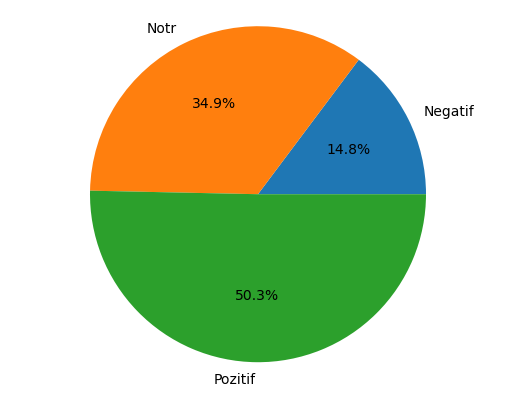

In [24]:
# DataFrame'i gruplama
grouped_df = result_df.groupby('value').size()

# Pasta grafiği çizimi
grouped_df.plot(kind='pie', autopct='%1.1f%%')

# Grafiği gösterme
plt.axis('equal')  # Daire şeklinde görüntülemek için
plt.show()

**- Duygu analizi sonuçu çıkan grafiği şu şekilde yorumlayabiliriz :**

%34,9 nötr: Twitlerin belirli bir kısmı nötr duyguya sahip. Bu, twitte ne olumlu ne de olumsuz yoğun bir duygu bulunmadığını gösterir.

%14,8 negatif: Twitlerin az bir kısmı olumsuz duygular içeriyor. Twitteki olumsuz ifadelerin varlığı, duygunun olumsuz olduğunu gösterir.

%50,3: Twitlerin büyük kısmı positif ve olumlu duygulardan oluşuyor. Twitteki pozitif ifadelerin varlığı, duygunun olumlu olduğunu gösterir.

## Kelime Bulutu oluşturmak

Kelime bulutu, bir metindeki kelimelerin frekansını ve önemini görsel olarak temsil eden bir grafik veya resimlerdir. Genellikle metindeki en sık kullanılan kelimeleri vurgulamak ve metnin ana konularını veya temalarını görsel olarak göstermek için kullanılır.

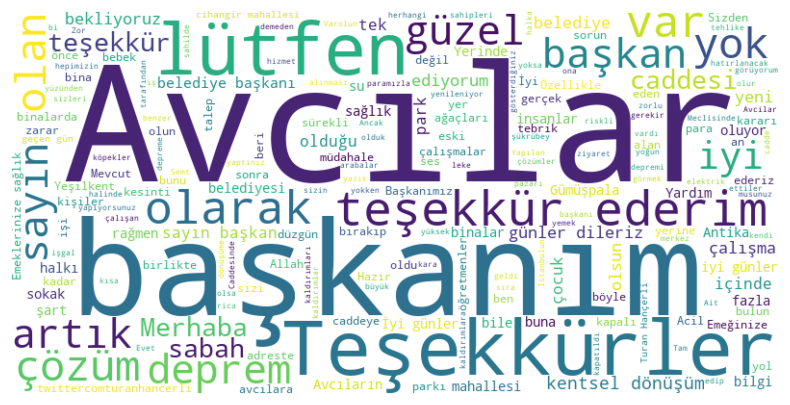

In [25]:
# Türkçe stopwords listesini yüklüyoruz
stop_words = set(stopwords.words('turkish'))

# Stopwords Listesini Yeni kelimeler ekliyoruz
new_stop_words = ['bu', 'ya', 'ki', 'mi', 'bir']
stop_words.update(new_stop_words)

# Kelimeleri birleştiriyoruz
text = " ".join(cleaned_tweets)

# Kelime bulutunu oluşturuyoruz
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(text)

# Kelime bulutunu görselleştiriyoruz
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Kelime bulutu, metindeki kelimelerin sıklığını görselleştirerek metindeki önemli kelimeleri belirlemeye ve analiz etmeye yardımcı olur. Bu kelime bulutunda çıkan "Avcılar", "Başkanın", "Teşekkürler", "Lütfen" ve "Güzel" kelimeleri, verilen metinde daha sık geçen ve belirgin olarak öne çıkan kelimeler olarak değerlendirilebilir.